# Проверка релевантности

## Сравнение с чистым доверием на основе опросов ФОМ

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
rcParams["font.size"] = 14

In [4]:
m={'mnb': 'MNB', 'lr': 'LR', 'svc': 'SVC', 
             'rf': 'RF', 'xgb': 'XGBoost', 'CNN': 'CNN', 'LSTM': 'LSTM', 'GRU':'GRU', 
             'RuBERT_1000': 'RuBERT (1000)', 'RuBERT_7000': 'RuBERT (7000)'}

In [5]:
FOM = pd.read_excel('trust_FOM.xlsx')
FOM

,Date,Доверяю,Не доверяю,Ind1,Ind2
0,2014-02,36,14,22,0.440000
1,2015-01,46,18,28,0.437500
2,2016-01,42,20,22,0.354839
3,2017-01,42,17,25,0.423729
4,2018-01,37,21,16,0.275862
5,2019-01,31,28,3,0.050847
6,2020-01,33,27,6,0.100000
7,2021-01,32,28,4,0.066667
8,2022-01,29,28,1,0.017544
9,2023-01,40,23,17,0.269841


### Для первого способа подсчёта чистого доверия на основе ФОМ

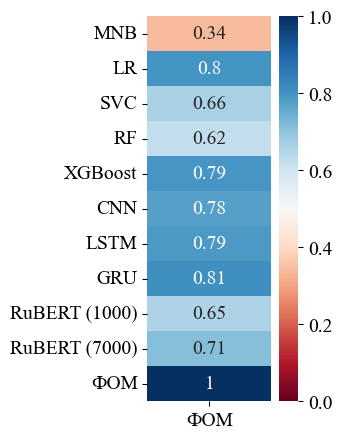

In [7]:
data=pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_y_{model_name}.csv'
    df=pd.read_csv(path)
    data[m[model_name]]=df['indicator']
data['ФОМ'] = FOM['Ind1'][:11]
plt.figure(figsize=(2, 5))
sns.heatmap(pd.DataFrame(data.corr()['ФОМ']), annot=True, cmap='RdBu', vmin=0)
plt.show()

In [8]:
import scipy.stats as stats
stats.pearsonr(data['RF'], data['ФОМ'])

PearsonRResult(statistic=0.6217179059634687, pvalue=0.04113809806256313)

In [9]:
stats.pearsonr(data['GRU'], data['ФОМ'])

PearsonRResult(statistic=0.8058677042892353, pvalue=0.0027451190197232476)

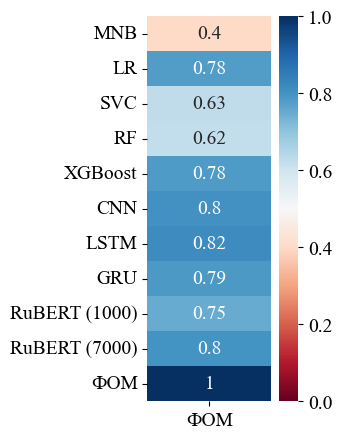

In [10]:
data=pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_y_{model_name}.csv'
    df=pd.read_csv(path)
    data[m[model_name]]=df['indicator']
data=data[1:]
data['ФОМ'] = FOM['Ind1'][1:11]
plt.figure(figsize=(2, 5))
sns.heatmap(pd.DataFrame(data.corr()['ФОМ']), annot=True, cmap='RdBu', vmin=0)
plt.show()

### Для второго способа подсчёта чистого доверия на основе ФОМ

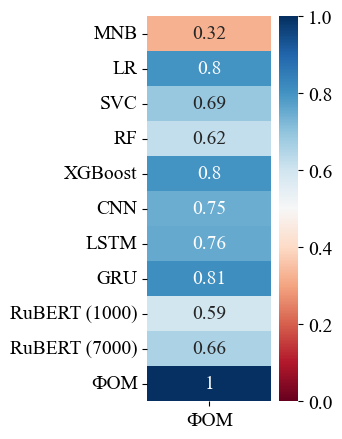

In [12]:
data=pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_y_{model_name}.csv'
    df=pd.read_csv(path)
    data[m[model_name]]=df['indicator']
data['ФОМ'] = FOM['Ind2'][:11]
plt.figure(figsize=(2, 5))
sns.heatmap(pd.DataFrame(data.corr()['ФОМ']), annot=True, cmap='RdBu', vmin=0)
plt.show()

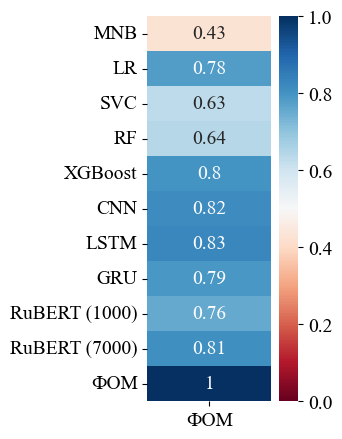

In [13]:
data=pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_y_{model_name}.csv'
    df=pd.read_csv(path)
    data[m[model_name]]=df['indicator']
data=data[1:]
data['ФОМ'] = FOM['Ind2'][1:11]
plt.figure(figsize=(2, 5))
sns.heatmap(pd.DataFrame(data.corr()['ФОМ']), annot=True, cmap='RdBu', vmin=0)
plt.show()